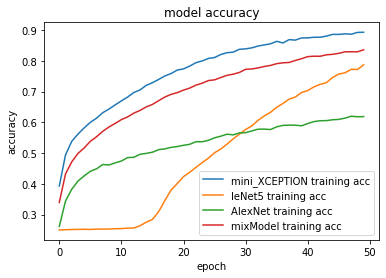

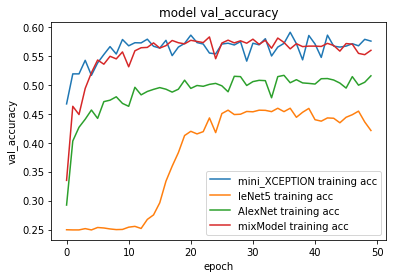

<Figure size 432x288 with 0 Axes>

In [2]:
'''
This is used to display training history
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import Ipynb_importer
import itertools
from Load_FER2013_data import load_data
from sklearn.metrics import confusion_matrix

%matplotlib inline


def historySave(history_name, history_file):
    with open(history_name, 'wb') as file_pi:
        pickle.dump(history_file.history, file_pi)
def historyRead(history_name):
    with open(history_name, 'rb') as file_pi:
        history_read = pickle.load(file_pi)
        return history_read

def accuracy_chart_single(history_single, model_name):
    fig = plt.figure()
    plt.plot(history_single.history['accuracy'],label= "accuracy")
    plt.plot(history_single.history['val_accuracy'],label= "val_accuracy")
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='lower right')
    plt.savefig(model_name)
    fig = plt.figure()
    plt.show()
    
def accuracy_chart_total():    
    fig = plt.figure()

    history_mx = historyRead("mini_XCEPTION_HISTORY.txt") 
    history_leNet5 = historyRead("leNet5_HISTORY.txt")
    history_AlexNet = historyRead("AlexNet_HISTORY.txt")
    history_mM = historyRead("mixModel_HISTORY.txt")

    plt.plot(history_mx['accuracy'],label='mini_XCEPTION training acc')
    plt.plot(history_leNet5['accuracy'],label='leNet5 training acc')
    plt.plot(history_AlexNet['accuracy'],label='AlexNet training acc')
    plt.plot(history_mM['accuracy'],label='mixModel training acc')

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='lower right')
    fig = plt.figure()
    
    plt.plot(history_mx['val_accuracy'],label='mini_XCEPTION training acc')
    plt.plot(history_leNet5['val_accuracy'],label='leNet5 training acc')
    plt.plot(history_AlexNet['val_accuracy'],label='AlexNet training acc')
    plt.plot(history_mM['val_accuracy'],label='mixModel training acc')

    plt.title('model val_accuracy')
    plt.ylabel('val_accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='lower right')
    fig = plt.figure()

def plot_confuse(model, x_val, y_val, model_name):
    if model_name == "mini_XCEPTION_HISTORY.png":
        predict = model.predict(x_val)
        predictions =np.argmax(predict,axis=1)
    else:
        predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1))  
    plt.savefig(model_name)
    plt.show()
    
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    EMOTIONS = ["angry", "disgust", "scared", "happy", "sad", "surprised", "neutral"]
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, EMOTIONS, rotation=45)
    plt.yticks(tick_marks, EMOTIONS)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.colorbar()
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
accuracy_chart_total()